 <a id="1"></a>
# <p style="background_color:#627D78;font_family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">MALNUTRITION PREDICITION</p>

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [48]:
data=pd.read_csv('Nutrition_data_set.csv')
data.head()

,Child_ID,Age_Months,Gender,Weight_kg,Height_cm,MUAC_cm,Hemoglobin_gdl,Meals_Per_Day,Mother_Education,Household_Income,Vaccination_Status,Nutrition_Status
0,CH001,44,Male,16.6,88.8,15.0,11.6,4,Primary,13103,Incomplete,Normal
1,CH002,57,Female,14.7,97.7,15.4,10.8,1,Secondary,19986,Complete,Normal
2,CH003,34,Male,15.9,112.4,12.1,7.4,3,Primary,15013,Incomplete,Severe
3,CH004,20,Male,9.0,119.0,11.4,10.6,2,Illiterate,3690,Incomplete,Moderate
4,CH005,48,Female,7.9,106.1,14.7,12.6,2,Secondary,19873,Complete,Normal


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Child_ID            500 non-null    object 
 1   Age_Months          500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Weight_kg           500 non-null    float64
 4   Height_cm           500 non-null    float64
 5   MUAC_cm             500 non-null    float64
 6   Hemoglobin_gdl      500 non-null    float64
 7   Meals_Per_Day       500 non-null    int64  
 8   Mother_Education    500 non-null    object 
 9   Household_Income    500 non-null    int64  
 10  Vaccination_Status  500 non-null    object 
 11  Nutrition_Status    500 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 47.0+ KB


In [50]:
data.isnull()

,Child_ID,Age_Months,Gender,Weight_kg,Height_cm,MUAC_cm,Hemoglobin_gdl,Meals_Per_Day,Mother_Education,Household_Income,Vaccination_Status,Nutrition_Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
data.isnull().sum()

Child_ID              0
Age_Months            0
Gender                0
Weight_kg             0
Height_cm             0
MUAC_cm               0
Hemoglobin_gdl        0
Meals_Per_Day         0
Mother_Education      0
Household_Income      0
Vaccination_Status    0
Nutrition_Status      0
dtype: int64

In [52]:
data.shape

(500, 12)

In [53]:
nutrition_map = {
    "Normal": 0,
    "Moderate": 1,
    "Severe": 2
}

data["Nutrition_Status"] = data["Nutrition_Status"].map(nutrition_map)

print(data.head())


  Child_ID  Age_Months  Gender  Weight_kg  Height_cm  MUAC_cm  Hemoglobin_gdl  \
0    CH001          44    Male       16.6       88.8     15.0            11.6   
1    CH002          57  Female       14.7       97.7     15.4            10.8   
2    CH003          34    Male       15.9      112.4     12.1             7.4   
3    CH004          20    Male        9.0      119.0     11.4            10.6   
4    CH005          48  Female        7.9      106.1     14.7            12.6   

   Meals_Per_Day Mother_Education  Household_Income Vaccination_Status  \
0              4          Primary             13103         Incomplete   
1              1        Secondary             19986           Complete   
2              3          Primary             15013         Incomplete   
3              2       Illiterate              3690         Incomplete   
4              2        Secondary             19873           Complete   

   Nutrition_Status  
0                 0  
1                 0  
2 

In [54]:
data["Gender"] = data["Gender"].map({
    "Female": 0,
    "Male": 1
})

print(data.head())

  Child_ID  Age_Months  Gender  Weight_kg  Height_cm  MUAC_cm  Hemoglobin_gdl  \
0    CH001          44       1       16.6       88.8     15.0            11.6   
1    CH002          57       0       14.7       97.7     15.4            10.8   
2    CH003          34       1       15.9      112.4     12.1             7.4   
3    CH004          20       1        9.0      119.0     11.4            10.6   
4    CH005          48       0        7.9      106.1     14.7            12.6   

   Meals_Per_Day Mother_Education  Household_Income Vaccination_Status  \
0              4          Primary             13103         Incomplete   
1              1        Secondary             19986           Complete   
2              3          Primary             15013         Incomplete   
3              2       Illiterate              3690         Incomplete   
4              2        Secondary             19873           Complete   

   Nutrition_Status  
0                 0  
1                 0  
2 

In [55]:
data["Mother_Education"] = data["Mother_Education"].map({
    "None": 0,
    "Primary": 1,
    "Secondary": 2,
    
})

print(data.head())

  Child_ID  Age_Months  Gender  Weight_kg  Height_cm  MUAC_cm  Hemoglobin_gdl  \
0    CH001          44       1       16.6       88.8     15.0            11.6   
1    CH002          57       0       14.7       97.7     15.4            10.8   
2    CH003          34       1       15.9      112.4     12.1             7.4   
3    CH004          20       1        9.0      119.0     11.4            10.6   
4    CH005          48       0        7.9      106.1     14.7            12.6   

   Meals_Per_Day  Mother_Education  Household_Income Vaccination_Status  \
0              4               1.0             13103         Incomplete   
1              1               2.0             19986           Complete   
2              3               1.0             15013         Incomplete   
3              2               NaN              3690         Incomplete   
4              2               2.0             19873           Complete   

   Nutrition_Status  
0                 0  
1                 

In [56]:
data = data.drop("Child_ID", axis=1)
data = data.drop("Vaccination_Status", axis=1)
data = data.drop("Mother_Education", axis=1)
data = data.drop("MUAC_cm",axis=1)
data = data.drop("Household_Income",axis=1)

In [57]:
data.head()

,Age_Months,Gender,Weight_kg,Height_cm,Hemoglobin_gdl,Meals_Per_Day,Nutrition_Status
0,44,1,16.6,88.8,11.6,4,0
1,57,0,14.7,97.7,10.8,1,0
2,34,1,15.9,112.4,7.4,3,2
3,20,1,9.0,119.0,10.6,2,1
4,48,0,7.9,106.1,12.6,2,0


In [58]:
data.drop_duplicates(inplace=True)
data.shape

(500, 7)

In [59]:
data.describe()

,Age_Months,Gender,Weight_kg,Height_cm,Hemoglobin_gdl,Meals_Per_Day,Nutrition_Status
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.312000,0.530000,12.715400,90.511800,10.544600,2.484000,0.932000
std,15.577161,0.499599,4.016232,17.579779,2.015499,1.135042,0.805403
min,6.000000,0.000000,6.100000,60.300000,7.000000,1.000000,0.000000
25%,20.750000,0.000000,9.100000,74.450000,8.975000,1.000000,0.000000
50%,34.000000,1.000000,12.600000,91.100000,10.600000,2.000000,1.000000
75%,46.000000,1.000000,16.125000,105.550000,12.300000,4.000000,2.000000
max,59.000000,1.000000,20.000000,120.000000,14.000000,4.000000,2.000000


In [60]:
data["Age_Months"].agg(['min', 'max'])



min     6
max    59
Name: Age_Months, dtype: int64

In [61]:
data["Weight_kg"].agg(['min', 'max'])

min     6.1
max    20.0
Name: Weight_kg, dtype: float64

In [62]:
data["Height_cm"].agg(['min', 'max'])

min     60.3
max    120.0
Name: Height_cm, dtype: float64

In [63]:
data["Hemoglobin_gdl"].agg(['min', 'max'])

min     7.0
max    14.0
Name: Hemoglobin_gdl, dtype: float64

In [64]:
data["Meals_Per_Day"].agg(['min', 'max'])

min    1
max    4
Name: Meals_Per_Day, dtype: int64

In [65]:
data["Age_Months"] = data["Age_Months"].astype(float)
data["Meals_Per_Day"] = data["Meals_Per_Day"].astype(float)

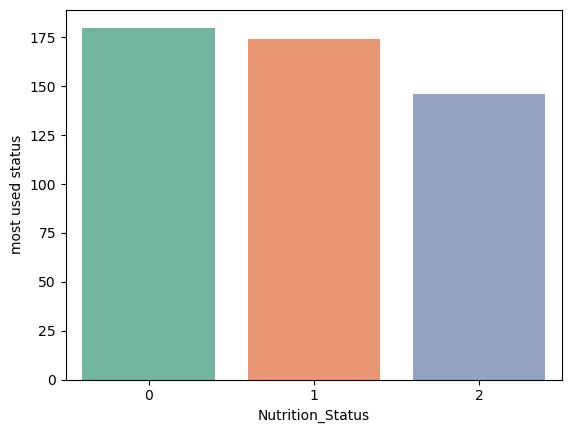

In [66]:
data['Nutrition_Status'].value_counts()
sns.countplot(x="Nutrition_Status",data=data,palette="Set2")
plt.xlabel('Nutrition_Status')
plt.ylabel('most used status')
plt.show()

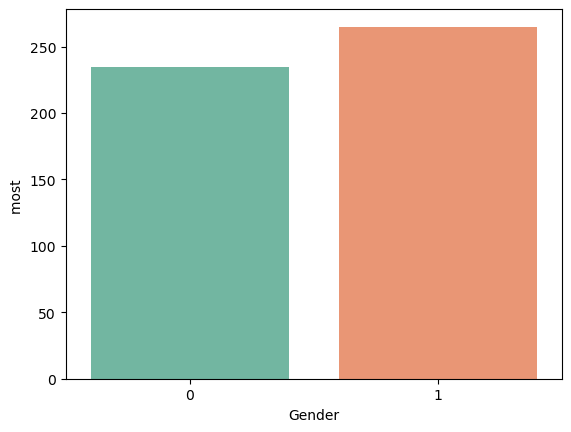

In [67]:
data['Gender'].value_counts()
sns.countplot(x="Gender",data=data,palette="Set2")
plt.xlabel('Gender')
plt.ylabel('most ')
plt.show()

by above data male childrens are higher than female

In [68]:
X=data.drop("Nutrition_Status",axis=1)
X.head()

,Age_Months,Gender,Weight_kg,Height_cm,Hemoglobin_gdl,Meals_Per_Day
0,44.0,1,16.6,88.8,11.6,4.0
1,57.0,0,14.7,97.7,10.8,1.0
2,34.0,1,15.9,112.4,7.4,3.0
3,20.0,1,9.0,119.0,10.6,2.0
4,48.0,0,7.9,106.1,12.6,2.0


In [69]:
data.columns

Index(['Age_Months', 'Gender', 'Weight_kg', 'Height_cm', 'Hemoglobin_gdl',
       'Meals_Per_Day', 'Nutrition_Status'],
      dtype='object')

In [70]:
y=data.Nutrition_Status
y.head()

0    0
1    0
2    2
3    1
4    0
Name: Nutrition_Status, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 6), (100, 6), (400,), (100,))

In [72]:
#feature scaling minmax scalar
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [73]:
X_train=scalar.fit_transform(X_train)
X_train

array([[0.03773585, 0.        , 0.73913043, 0.45226131, 0.44285714,
        0.33333333],
       [0.60377358, 1.        , 0.23188406, 0.10217755, 0.62857143,
        0.        ],
       [0.32075472, 0.        , 0.19565217, 0.82747069, 0.34285714,
        0.        ],
       ...,
       [0.96226415, 0.        , 0.66666667, 0.38860972, 0.85714286,
        1.        ],
       [0.11320755, 0.        , 0.57246377, 0.06700168, 0.11428571,
        1.        ],
       [0.33962264, 1.        , 0.38405797, 0.23450586, 0.2       ,
        1.        ]], shape=(400, 6))

In [74]:
X_train_df=pd.DataFrame(X_train)
X_train_df.describe()

,0,1,2,3,4,5
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.509575,0.537500,0.476341,0.514276,0.498893,0.492500
std,0.295321,0.499216,0.288833,0.290781,0.286987,0.373815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264151,0.000000,0.217391,0.262563,0.271429,0.000000
50%,0.528302,1.000000,0.474638,0.532663,0.485714,0.333333
75%,0.754717,1.000000,0.719203,0.757956,0.746429,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X_test=scalar.transform(X_test)
X_test

array([[ 0.9245283 ,  0.        ,  0.74637681,  0.40536013,  0.17142857,
         0.33333333],
       [ 0.39622642,  1.        ,  0.11594203,  0.16247906,  0.65714286,
         0.66666667],
       [ 0.77358491,  0.        ,  0.82608696,  0.5360134 ,  1.        ,
         0.        ],
       [ 0.75471698,  1.        ,  0.16666667,  0.0318258 ,  0.41428571,
         0.66666667],
       [ 0.1509434 ,  1.        ,  0.62318841,  0.21943049,  0.18571429,
         1.        ],
       [ 0.50943396,  0.        ,  0.53623188,  0.02847571,  0.82857143,
         0.        ],
       [ 0.41509434,  1.        ,  0.28985507,  0.93467337,  0.12857143,
         1.        ],
       [ 0.01886792,  1.        ,  0.74637681,  0.77051926,  0.58571429,
         0.33333333],
       [ 0.73584906,  0.        ,  0.14492754,  0.74874372,  0.54285714,
         0.33333333],
       [ 0.71698113,  0.        ,  0.66666667,  0.93132328,  0.3       ,
         0.33333333],
       [ 0.03773585,  1.        ,  0.80434783,  0.

# linear regression

In [76]:
from sklearn.linear_model import LinearRegression

Lr_model=LinearRegression()

Lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
from sklearn.metrics import r2_score
Lr_pred = Lr_model.predict(X_test)
Acc_Lr = r2_score(y_test,Lr_pred)
print(f"Linear Regression Model Accuracy::{round(Acc_Lr*100)}")


Linear Regression Model Accuracy::29


# support vector machine

In [78]:
from sklearn.svm import SVR
SVR_model=SVR()
SVR_model.fit(X_train,y_train)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [79]:
SVR_Pre=SVR_model.predict(X_test)
Acc_SVR=r2_score(y_test,SVR_Pre)
print(f"Support Vector Regression Accuracy::{round(Acc_SVR*100)}")

Support Vector Regression Accuracy::33


# DT


In [80]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [81]:
dt_Pre=dt_model.predict(X_test)
Acc_dt=r2_score(y_test,dt_Pre)
print(f"Decision Tree Model Accurancy::{round(Acc_dt*100)}")

Decision Tree Model Accurancy::-25


# Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
RF_Pre=RF_model.predict(X_test)
Acc_RF=r2_score(y_test,RF_Pre)
print(f"Random Forest Model Accuracy::{round(Acc_RF*100)}")

Random Forest Model Accuracy::33


# KNN Regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [85]:
KNN_Pre=KNN_model.predict(X_test)
Acc_KNN=r2_score(y_test,KNN_Pre)
print(f"KNN Model Accurancy::{round(Acc_KNN*100)}")

KNN Model Accurancy::22


In [86]:
Accurancy=[Acc_Lr,Acc_KNN,Acc_RF,Acc_dt,Acc_SVR,]
models=['LinearRegression','KNeighborsRegressor','RandomForestRegressor','decisiontree','supportvector']

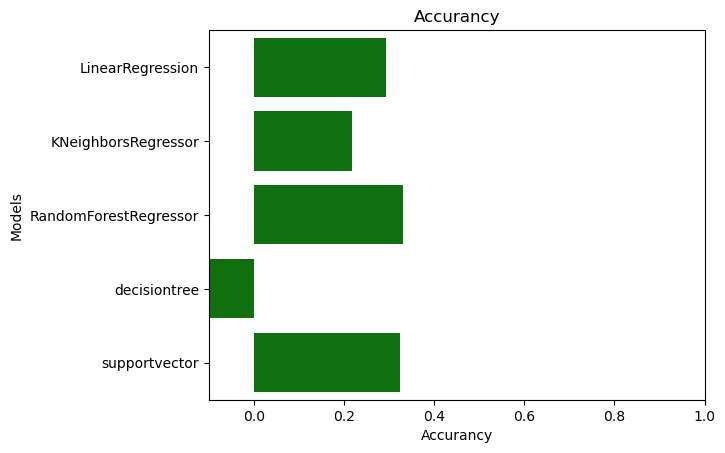

In [87]:
sns.barplot(x=Accurancy,y=models, color="g")
plt.xlim([-0.1,1.0])
plt.xlabel('Accurancy')
plt.ylabel('Models')
plt.title('Accurancy')
plt.show()

# save scalar parameters

In [88]:
import pickle
filename='New_scalar.pkl'
pickle.dump(scalar,open(filename,'wb'))
filename='New_RF_model.pkl'
pickle.dump(scalar,open(filename,'wb'))

In [89]:
X_train_df.head()

,0,1,2,3,4,5
0,0.037736,0.0,0.739130,0.452261,0.442857,0.333333
1,0.603774,1.0,0.231884,0.102178,0.628571,0.000000
2,0.320755,0.0,0.195652,0.827471,0.342857,0.000000
3,0.471698,0.0,0.949275,0.376884,0.985714,0.000000
4,0.471698,0.0,0.065217,0.534338,0.900000,0.333333
